<a href="https://colab.research.google.com/github/AlanItzep/AplicacionJS/blob/master/Semantic_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch

a = torch.ones(5)
print(a)

tensor([1., 1., 1., 1., 1.])


In [0]:
b = torch.zeros(5)
print(b)

tensor([0., 0., 0., 0., 0.])


In [0]:
c = torch.tensor([1.0,2.0,3.0,4.0,5.0])
print(c)

tensor([1., 2., 3., 4., 5.])


In [0]:
d = torch.zeros(3,2)
print(d)

tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])


In [0]:
e = torch.ones([3,2])
print(e)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])


In [0]:
f = torch.tensor([[1.0,2.0],[3.0,4.0]])
print(f)

tensor([[1., 2.],
        [3., 4.]])


In [0]:
g = torch.tensor([[[1.,2.],[3.,4.]],[[5.,6.],[7.,8.]]])
print(g)

tensor([[[1., 2.],
         [3., 4.]],

        [[5., 6.],
         [7., 8.]]])


In [0]:
print(f.shape)

torch.Size([2, 2])


In [0]:
print(e.shape)

torch.Size([3, 2])


In [0]:
print(g.shape)

torch.Size([2, 2, 2])


In [0]:
print(c[2])

tensor(3.)


In [0]:
print(f[1,0])

tensor(3.)


In [0]:
print(g[1][0][0])

tensor(5.)


In [0]:
print(f[:])

tensor([[1., 2.],
        [3., 4.]])


In [0]:
print(c[1:3])

tensor([2., 3.])


In [0]:
print(c[:4])

tensor([1., 2., 3., 4.])


In [0]:
print(f[0,:])

tensor([1., 2.])


In [0]:
print(f[:,1])

tensor([2., 4.])


In [1]:
from torchvision import models
fcn = models.segmentation.fcn_resnet101(pretrained=True).eval()

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/checkpoints/resnet101-5d3b4d8f.pth


Downloading: "https://download.pytorch.org/models/fcn_resnet101_coco-7ecb50ca.pth" to /root/.cache/torch/checkpoints/fcn_resnet101_coco-7ecb50ca.pth


2020-03-02 08:57:52 URL:https://static.independent.co.uk/s3fs-public/thumbnails/image/2018/04/10/19/pinyon-jay-bird.jpg [182965/182965] -> "bird.png" [1]


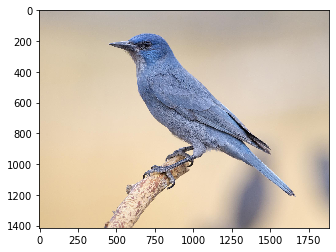

In [2]:
from PIL import Image 
import matplotlib.pyplot as plt
import torch
!wget -nv https://static.independent.co.uk/s3fs-public/thumbnails/image/2018/04/10/19/pinyon-jay-bird.jpg -O bird.png
img = Image.open('./bird.png')
plt.imshow(img)

In [0]:
import torchvision.transforms as T
trf = T.Compose([T.Resize(256),
                 T.CenterCrop(224),
                 T.ToTensor(),
                 T.Normalize(mean = [0.485,0.456,0.406],
                             std = [0.229, 0.224,0.225])])
inp = trf(img).unsqueeze(0)

In [4]:
out = fcn(inp)['out']
print(out.shape)

torch.Size([1, 21, 224, 224])


In [5]:
import numpy as np 
om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
print(om.shape)

(224, 224)


In [6]:
print(np.unique(om))

[0 3]


In [0]:
# Define the helper function
def decode_segmap(image, nc=21):
  label_colors = np.array([(0, 0, 0),  # 0=background
                           # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
                           (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128),
                           # 6=bus, 7=car, 8=cat, 9=chair, 10=cow
                           (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0),
                           # 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person
                           (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (192, 128, 128),
                           # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
                           (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)])
  
  r = np.zeros_like(image).astype(np.uint8)
  g = np.zeros_like(image).astype(np.uint8)
  b = np.zeros_like(image).astype(np.uint8)
  for l in range(0, nc):
    idx = image == l
    r[idx] = label_colors[l, 0]
    g[idx] = label_colors[l, 1]
    b[idx] = label_colors[l, 2]
  rgb = np.stack([r, g, b], axis=2)
  return rgb

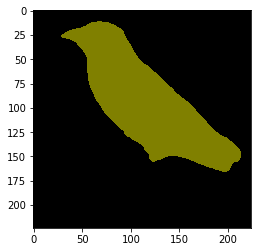

In [8]:
rgb = decode_segmap(om)
plt.imshow(rgb)

In [0]:
def segment(net, path):
  img = Image.open(path)
  plt.imshow(img);plt.axis('off'); plt.show()
  trf = T.Compose([T.Resize(256),
                 T.CenterCrop(224),
                 T.ToTensor(),
                 T.Normalize(mean = [0.485,0.456,0.406],
                             std =[0.229,0.224,0.225])])
  inp = trf(img).unsqueeze(0)
  out = net(inp)['out']
  om = torch.argmax(out.squeeze(),
                  dim=0).detach().cpu().numpy()
  rgb = decode_segmap(om)
  plt.imshow(rgb); plt.axis('off'); plt.show()

2020-03-02 08:57:57 URL:https://thumbs.dreamstime.com/z/el-jinete-de-la-muchacha-se-coloca-al-lado-del-caballo-en-campo-retrato-moda-una-mujer-y-las-yeguas-son-caballos-pueblo-hierba-129547837.jpg [331758/331758] -> "horse.png" [1]


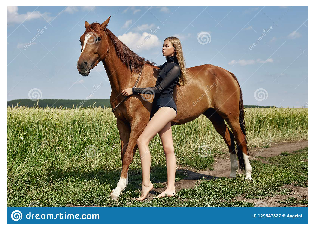

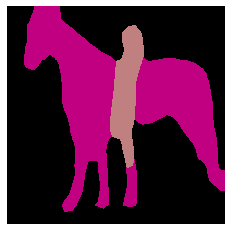

In [10]:
!wget -nv https://thumbs.dreamstime.com/z/el-jinete-de-la-muchacha-se-coloca-al-lado-del-caballo-en-campo-retrato-moda-una-mujer-y-las-yeguas-son-caballos-pueblo-hierba-129547837.jpg -O horse.png
segment(fcn,'./horse.png')

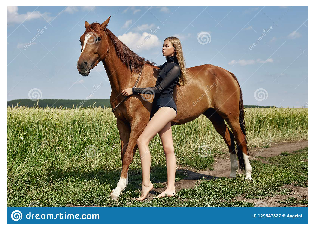

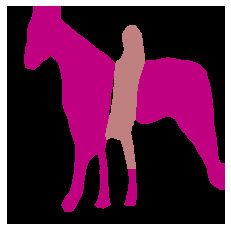

In [13]:
dlab = models.segmentation.deeplabv3_resnet101(pretrained=1).eval()
segment(dlab, './horse.png')

2020-03-02 09:17:46 URL:https://cf-images.us-east-1.prod.boltdns.net/v1/static/5615998029001/bc70736b-9af3-4951-b37d-9601f5cb8891/1ecc2462-abe9-41ff-a356-f8a9fd65c585/1280x720/match/image.jpg [385498] -> "dog-park.png" [1]


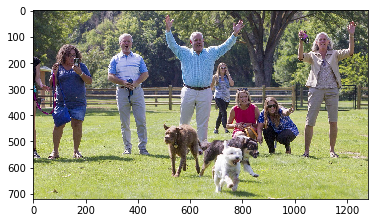

Segmentation Image on FCN


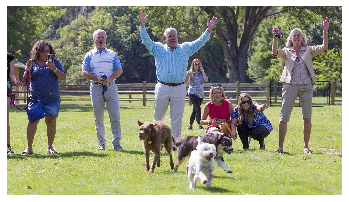

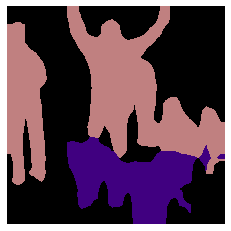

Segmentation Image on DeepLabV3


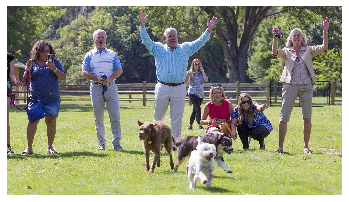

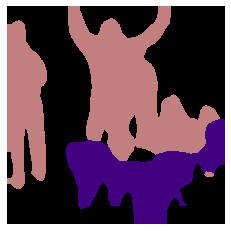

In [29]:
!wget -nv "https://cf-images.us-east-1.prod.boltdns.net/v1/static/5615998029001/bc70736b-9af3-4951-b37d-9601f5cb8891/1ecc2462-abe9-41ff-a356-f8a9fd65c585/1280x720/match/image.jpg" -O dog-park.png
img = Image.open('./dog-park.png')
plt.imshow(img); plt.show()

print('Segmentation Image on FCN')
segment(fcn, path='./dog-park.png')

print('Segmentation Image on DeepLabV3')
segment(dlab, path='./dog-park.png')

In [0]:
imgimg